In [158]:
import sys
sys.path.insert(0, '../')
import ccob_qe_analysis_BOT as ana
import ccob_utils as u
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import numpy as np
import glob
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
outdir_fits = '/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits'
led = 'red'

raft_list = ['R01','R02','R11','R12','R20','R22','R30']
e2v_list = ['R11','R12','R22', 'R30']
sensor_list = ['S00','S01','S02','S10','S11','S12','S20','S21','S22']
ccdid_list = sorted([raft+'_'+sensor for sensor in sensor_list for raft in raft_list])
flist = {}
for i,ccdid in enumerate(ccdid_list):
    flist[ccdid] = glob.glob(os.path.join(outdir_fits,'QE_'+ccdid+'_'+led+'*'))

In [164]:
ccob_diagnostic = {}
for key in list(flist.keys()):
    if key[0:3] in e2v_list:
        images = np.zeros((5, 4004, 4096))
    else:
        images = np.zeros((5, 4000, 4072))
    for i,f in enumerate(flist[key]):
        images[i], dum = u.make_ccd_2d_array(f)
    mean = np.mean(images, axis=0)
    std = np.std(images, axis=0)
    ccob_diagnostic[key]={}
    ccob_diagnostic[key]['avg of mean'] = np.mean(mean) # mean of the mean image obtained from averaging the 5 pointings
    ccob_diagnostic[key]['stddev of mean'] = np.std(mean)# std of the mean image obtained from averaging the 5 pointings
    ccob_diagnostic[key]['avg of std'] = np.mean(std) # mean of the std image obtained from the 5 pointings
    ccob_diagnostic[key]['stddev of std'] = np.std(std) # std of the std image obtained from the 5 pointings

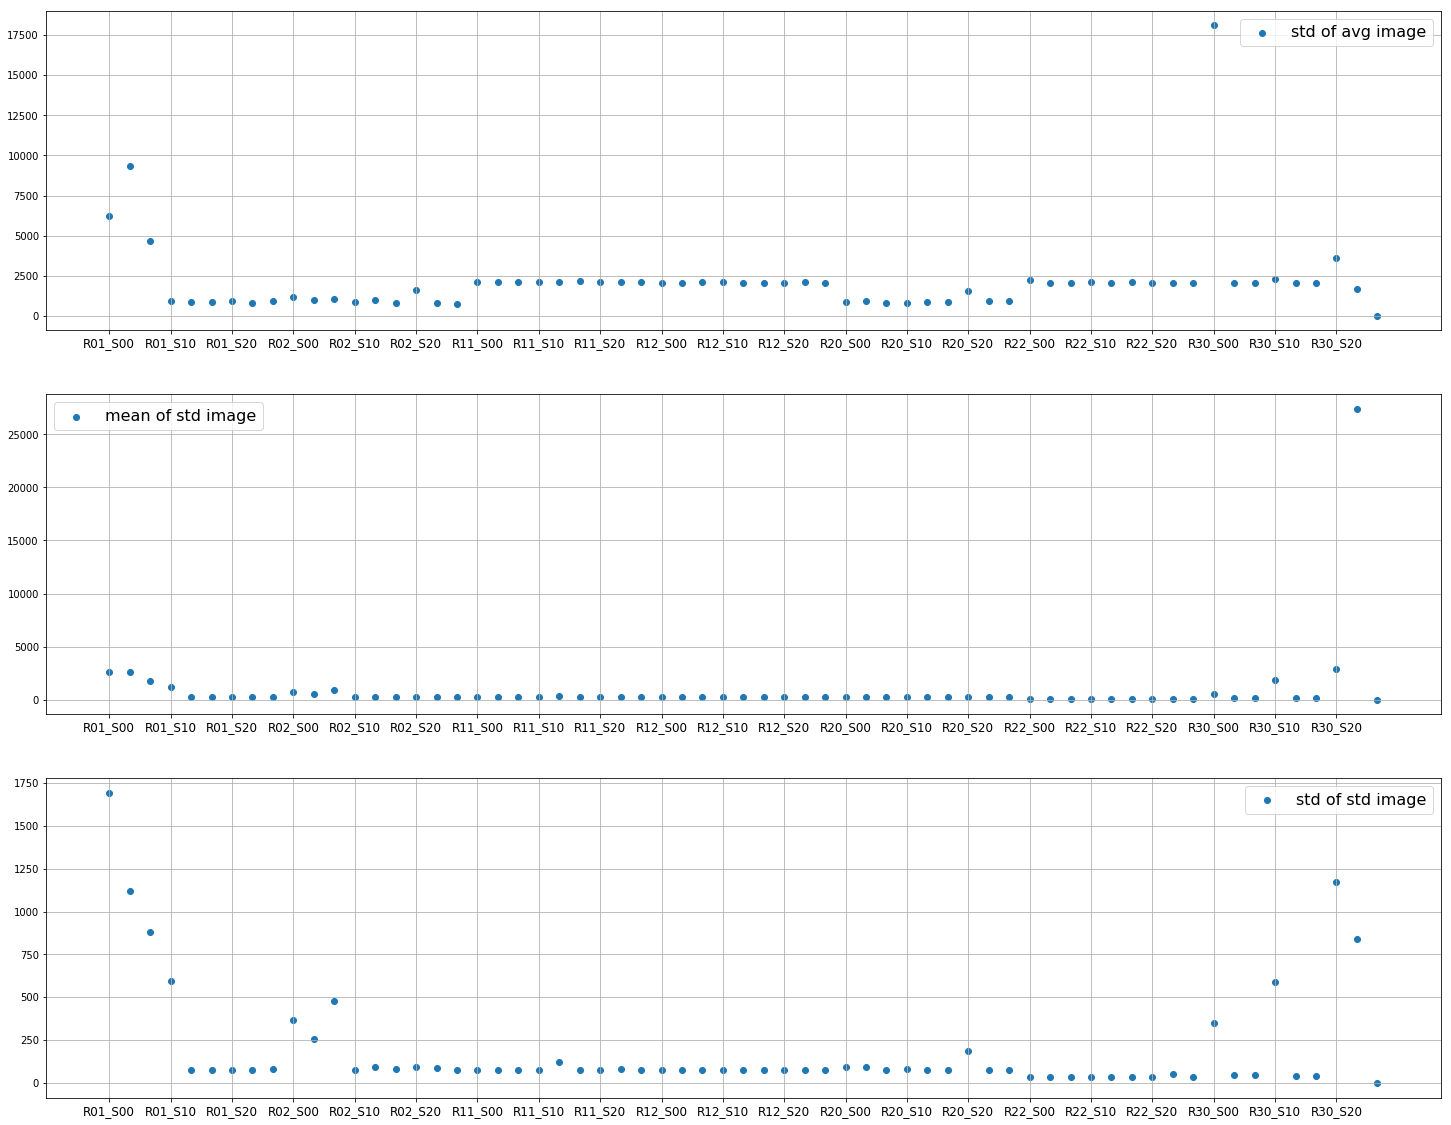

In [215]:
x_label = []
std_of_std = []
mean_of_mean = []
std_of_mean = []
mean_of_std = []

for key in list(flist.keys()):
    x_label = x_label + [key]
    std_of_std = std_of_std + [ccob_diagnostic[key]['stddev of std']]
    mean_of_mean = mean_of_mean + [ccob_diagnostic[key]['avg of mean']]
    std_of_mean = std_of_mean + [ccob_diagnostic[key]['stddev of mean']]
    mean_of_std = mean_of_std + [ccob_diagnostic[key]['avg of std']]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25,20))
x_axis = np.arange(0, len(x_label))
axes[0].scatter(x_axis, std_of_mean,  label='std of avg image')
axes[1].scatter(x_axis, mean_of_std,  label='mean of std image')
axes[2].scatter(x_axis, std_of_std,   label='std of std image')

axes[0].set_xticks(x_axis[0:len(x_axis):3])
axes[0].set_xticklabels(x_label[0:len(x_axis):3], fontsize=12)
axes[1].set_xticks(x_axis[0:len(x_axis):3])
axes[1].set_xticklabels(x_label[0:len(x_axis):3], fontsize=12)
axes[2].set_xticks(x_axis[0:len(x_axis):3])
axes[2].set_xticklabels(x_label[0:len(x_axis):3], fontsize=12)
axes[0].legend(fontsize=16)
axes[1].legend(fontsize=16)
axes[2].legend(fontsize=16)
axes[0].grid()
axes[1].grid()
axes[2].grid()

fig.savefig('/home/combet/tmp_9rafts/QE_results/figs/ccob_diagnostic.pdf')
